In [1]:
import pickle
# from matplotlib import pyplot as plt
import numpy as np
import sklearn.metrics as metrics

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

with open('preds.pkl', 'rb') as f:
    preds = pickle.load(f)

with open('deepseekV3_answers.pkl', 'rb') as f:
    deepseek_v3_preds = pickle.load(f)

with open('mamba_outputs_with_mean_dt.pkl', 'rb') as f:
    mamba_outputs = pickle.load(f)


deepseek_v2_preds, _ = zip(*preds['deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct'])
bool_false_parts = [np.array([p!='.' for _, p in d['context']]) for d in data]
false_parts = [np.arange(len(part))[part] for part in bool_false_parts]

16 <class 'list'>
16 <class 'numpy.ndarray'>
16 <class 'numpy.ndarray'>
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
{0, 1, 3, 4, 5, 7, 9, 10, 12, 13, 15}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
{0, 1, 3, 4, 5, 7, 9, 10, 12, 13, 15}


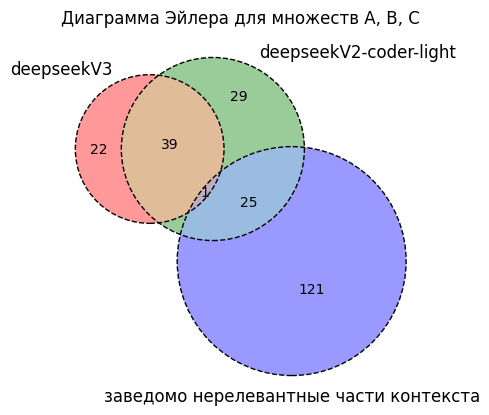

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

print(len(deepseek_v3_preds), type(deepseek_v3_preds[0]))  # список списков индексов
print(len(deepseek_v2_preds), type(deepseek_v2_preds[0]))  # список списков индексов
print(len(false_parts), type(false_parts[0]))  # список списков индексов


def extract_correct_case_indices(lli):
    return {i for i, l in enumerate(lli) if l is not None}

deepseek_v3_correct_cases = extract_correct_case_indices(deepseek_v3_preds)
deepseek_v2_correct_cases = extract_correct_case_indices(deepseek_v2_preds)
false_parts_correct_cases = extract_correct_case_indices(false_parts)

print(deepseek_v3_correct_cases)
print(deepseek_v2_correct_cases)
print(false_parts_correct_cases)

correct_cases = deepseek_v3_correct_cases & deepseek_v2_correct_cases & false_parts_correct_cases

print(correct_cases)

def list_lists_of_indices_to_set(lli, correct_cases):
    res = set()
    for i in correct_cases:
        res = res | {(i, idx) for idx in lli[i]}
    return res

A = list_lists_of_indices_to_set(deepseek_v3_preds, correct_cases)
B = list_lists_of_indices_to_set(deepseek_v2_preds, correct_cases)
C = list_lists_of_indices_to_set(false_parts, correct_cases)

# Создание диаграммы Эйлера
venn = venn3([A, B, C], ('deepseekV3', 'deepseekV2-coder-light', 'заведомо нерелевантные части контекста'))

# Подписи количества элементов (можно изменить, если автоматические неверны)
venn.get_label_by_id('100').set_text(len(A - B - C))
venn.get_label_by_id('010').set_text(len(B - A - C))
venn.get_label_by_id('001').set_text(len(C - A - B))
venn.get_label_by_id('110').set_text(len(A & B - C))
# venn.get_label_by_id('101').set_text(len(A & C - B))
venn.get_label_by_id('011').set_text(len(B & C - A))
venn.get_label_by_id('111').set_text(len(A & B & C))

# Добавляем окружности для лучшей видимости (опционально)
venn3_circles([A, B, C], linestyle='dashed', linewidth=1)

plt.title("Диаграмма Эйлера для множеств A, B, C")
plt.show()

0.5157234567901234


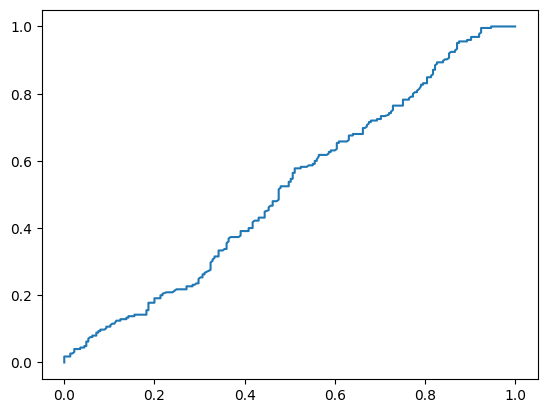

In [3]:
mamba_cases = extract_correct_case_indices(mamba_outputs[1])

mamba_delta_pred = np.concatenate([np.array(mamba_outputs[1][i]) for i in mamba_cases])
mamba_delta_target = np.concatenate([np.array(bool_false_parts[i]) for i in mamba_cases])

# mamba_delta_pred.shape, mamba_delta_target.shape

fpr, tpr, threshold = metrics.roc_curve(mamba_delta_target, mamba_delta_pred)
print(metrics.roc_auc_score(mamba_delta_target, mamba_delta_pred))
plt.plot(fpr, tpr)

In [4]:
len(mamba_outputs[1][6])

64

In [5]:
mamba_outputs[0]

['\nGiven that the instructions above do not explicitly request the writing of test cases, I\'ll formulate a hypothetical scenario involving a set of generic and more common test cases one might write in relation to the Spring pet clinic application logic, assuming "instructions above" is referring to the context of Spring Petclinic backend implementation as discussed before.\n\nGiven the complexity and scope of backend logic in a comprehensive application, covering all possible tests is beyond a reasonable length for a single response. However, I',
 "\nTo write tests for the provided code, we need to mock the dependencies and simulate the behavior of the `CustomEmail` class, specifically focusing on the implementation of `isEmailValid`. We'll also test the `CustomEmail` class itself by mocking the `CustomEmailValidator` instance.\n\nHere's the provided code:\n\n```java\nimport javax.validation.Constraint;\nimport javax.validation.ConstraintValidator;\nimport javax.validation.Constrain

In [6]:
max([max(m) for m in mamba_outputs[1] if m is not None])

0.20947265625

In [7]:
min([min(m) for m in mamba_outputs[1] if m is not None])

0.08343505859375